In [1]:
import numpy as np
import pdb
# import matplotlib
# matplotlib.use('Agg')
import matplotlib.pylab as plt
from scipy import special

from context import aep, compute_psi_weave, compute_kernel, compute_psi_weave_new
from datautils import step, spiral
from context import config

In [2]:
import sys
sys.path.append('../geepee')
from kernels import compute_psi_weave_new

In [3]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=False)

/usr/local/lib/python2.7/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [4]:
x_train = np.concatenate([np.vstack([img.reshape(-1,) for img in mnist.train.images]),\
                          np.vstack([img.reshape(-1,) for img in mnist.validation.images])], axis=0)
y_train = np.concatenate([mnist.train.labels, mnist.validation.labels],axis=0)

x_test = np.vstack([img.reshape(-1,) for img in mnist.test.images])
y_test = mnist.test.labels

del mnist

In [5]:
y_train = np.reshape(y_train,(-1,1))
y_test = np.reshape(y_test,(-1,1))

In [15]:
M = 100 #number of inducing points
hidden_size = [30] #dimensions of hidden layers
dgp1_origin = aep.SDGPR(x_train, y_train, M, hidden_size, lik='Multiclass')
mb_size = 1000 #mini-batch size
dgp1_origin.optimise(method='adam', alpha=1.0, maxiter=2000,
                mb_size=mb_size, adam_lr=0.001)

iter 0 	 obj 2.3260139
iter 10 	 obj 2.2924339
iter 20 	 obj 2.1637068
iter 30 	 obj 1.8752843
iter 40 	 obj 1.5406573
iter 50 	 obj 1.2115429
iter 60 	 obj 0.9055205
iter 70 	 obj 0.7574115
iter 80 	 obj 0.6959135
iter 90 	 obj 0.5954014
iter 100 	 obj 0.5640536
iter 110 	 obj 0.5362309
iter 120 	 obj 0.4871459
iter 130 	 obj 0.5015906
iter 140 	 obj 0.4262998
iter 150 	 obj 0.4435196
iter 160 	 obj 0.4245011
iter 170 	 obj 0.4040214
iter 180 	 obj 0.3850855
iter 190 	 obj 0.3965801
iter 200 	 obj 0.3581319
iter 210 	 obj 0.3333930
iter 220 	 obj 0.3785397
iter 230 	 obj 0.3529055
iter 240 	 obj 0.3532124
iter 250 	 obj 0.3637701
iter 260 	 obj 0.2959906
iter 270 	 obj 0.3218017
iter 280 	 obj 0.3158415
iter 290 	 obj 0.3268413
iter 300 	 obj 0.3125809
iter 310 	 obj 0.2956069
iter 320 	 obj 0.2992157
iter 330 	 obj 0.3019558
iter 340 	 obj 0.2895694
iter 350 	 obj 0.3130270
iter 360 	 obj 0.2869468
iter 370 	 obj 0.2658542
iter 380 	 obj 0.2703715
iter 390 	 obj 0.2672343
iter 400 	 

{'eta1_R_0': array([[ 1.4841908 , -0.16199078, -0.07615162, ...,  1.34106808,
         -0.04399207,  0.39103462],
        [ 0.78254199,  0.01426037, -0.0317    , ...,  0.32252149,
          0.09398131,  1.42536396],
        [ 0.44817678, -0.05757592, -0.17844129, ...,  0.43002442,
          0.05775312,  0.63397865],
        ...,
        [ 1.23009436,  0.00976566, -0.03820856, ...,  0.57866655,
         -0.0318341 ,  0.75938705],
        [ 0.74553016, -0.06520251, -0.02723658, ...,  0.77488233,
         -0.06079581,  0.56509585],
        [ 1.01776456,  0.02850828,  0.11025889, ...,  0.37333232,
         -0.26563008,  0.56236869]]),
 'eta1_R_1': array([[ 0.70189443,  0.06062769,  0.05511903, ...,  0.31136348,
         -0.10217211,  0.5574866 ],
        [ 3.28346317, -0.06617056, -0.05845332, ...,  0.27660973,
         -0.08833328,  0.4738861 ],
        [ 0.69571681,  0.03621095,  0.01720688, ...,  0.38429158,
         -0.17984272,  0.96945037],
        ...,
        [ 0.9785414 , -0.01963

In [6]:
M = 100 #number of inducing points
hidden_size = [30,30] #dimensions of hidden layers
dgp3 = aep.SDGPR(x_train, y_train, M, hidden_size, lik='Multiclass')
mb_size = 1000 #mini-batch size
dgp3.optimise(method='adam', alpha=1.0, maxiter=2000,
                mb_size=mb_size, adam_lr=0.001)

iter 0 	 obj 2.3351833
iter 10 	 obj 2.3311752
iter 20 	 obj 2.3284862
iter 30 	 obj 2.3264677
iter 40 	 obj 2.3248118
iter 50 	 obj 2.3233819
iter 60 	 obj 2.3220970
iter 70 	 obj 2.3209378
iter 80 	 obj 2.3198292
iter 90 	 obj 2.3186642
iter 100 	 obj 2.3175795
iter 110 	 obj 2.3114464
iter 120 	 obj 2.2801888
iter 130 	 obj 2.2102593
iter 140 	 obj 2.1331928
iter 150 	 obj 2.1282870
iter 160 	 obj 2.0361304
iter 170 	 obj 1.8679947
iter 180 	 obj 1.6547478
iter 190 	 obj 1.4475559
iter 200 	 obj 1.2299316
iter 210 	 obj 1.0279952
iter 220 	 obj 0.9608325
iter 230 	 obj 0.8431687
iter 240 	 obj 0.7452142
iter 250 	 obj 0.6650866
iter 260 	 obj 0.5894762
iter 270 	 obj 0.5621851
iter 280 	 obj 0.5021344
iter 290 	 obj 0.4800265
iter 300 	 obj 0.4562342
iter 310 	 obj 0.4443667
iter 320 	 obj 0.4450227
iter 330 	 obj 0.4289014
iter 340 	 obj 0.4339497
iter 350 	 obj 0.4121727
iter 360 	 obj 0.4196056
iter 370 	 obj 0.4423154
iter 380 	 obj 0.3721333
iter 390 	 obj 0.3428477
iter 400 	 

{'eta1_R_0': array([[ 0.830621  ,  0.11556468,  0.04089364, ...,  0.34964796,
          0.06125765,  0.68320304],
        [ 0.68387287,  0.11469659,  0.05547631, ...,  0.59426377,
          0.03849438,  0.94173816],
        [ 0.4259697 ,  0.22186183,  0.04259636, ...,  0.20026875,
         -0.16186628,  1.68191516],
        ...,
        [ 1.62342778,  0.28922338,  0.03633897, ...,  0.71114607,
          0.01446775,  0.59029392],
        [ 0.67823237,  0.10075397, -0.02028869, ...,  0.07495098,
         -0.2538961 ,  0.76243589],
        [ 0.50835756,  0.1248106 ,  0.10504949, ...,  0.53279499,
          0.0741867 ,  0.78168906]]),
 'eta1_R_1': array([[ 0.52738386, -0.05071275, -0.00279843, ...,  0.59860397,
         -0.16504609,  0.42546067],
        [ 0.41029912, -0.06776997, -0.02893247, ...,  0.14593343,
         -0.20621658,  0.44134809],
        [ 1.89775445, -0.0656587 , -0.03083673, ...,  0.90880339,
         -0.25117833,  0.4515169 ],
        ...,
        [ 0.69670142, -0.09779

In [16]:
def assess_model(model, X_batch, Y_batch):
    mf, vf = model.predict_f_mm_linearMean(X_batch)
    m,v = output_probabilistic(mf, vf)
    l = predict_density(mf, vf, Y_batch)
    a = (np.argmax(m, 1).reshape(Y_batch.shape).astype(int)==Y_batch.astype(int))
    return l, a

def batch_assess(model, assess_model, X, Y):
    n_batches = max(int(len(X)/1000), 1)
    lik, acc = [], []
    for X_batch, Y_batch in zip(np.split(X, n_batches), np.split(Y, n_batches)):
        l, a = assess_model(model, X_batch, Y_batch)
        lik.append(l)
        acc.append(a)
    lik = np.concatenate(lik, 0)
    acc = np.array(np.concatenate(acc, 0), dtype=float)
    return np.average(lik), np.average(acc)

In [17]:
def _predict_non_logged_density(mout, vout, Y):
    epsilon = 1e-3
    C = 10
    gh_x, gh_w = np.polynomial.hermite.hermgauss(20)
    gh_w = gh_w[:, np.newaxis]

    Y = np.reshape(Y, (-1,))
    oh_on = np.zeros((Y.shape[0], C))
    oh_on[np.arange(Y.shape[0]),Y] = 1
    oh_on.astype(mout.dtype)
    oh_off = np.ones((Y.shape[0], C))
    oh_off[np.arange(Y.shape[0]),Y] = 0
    oh_off.astype(mout.dtype)
    mu_selected = np.sum(oh_on * mout, 1)
    var_selected = np.sum(oh_on * vout, 1)
    X = (np.reshape(mu_selected, (-1, 1)) +
             gh_x * np.reshape(np.sqrt(np.clip(2. * var_selected, 1e-10, np.inf)), (-1, 1)))

    dist = (np.expand_dims(X, 1) - np.expand_dims(mout, 2)) / np.expand_dims(
        np.sqrt(np.clip(vout, 1e-10, np.inf)), 2)
    cdfs = 0.5 * (1.0 + special.erf(dist / np.sqrt(2.0)))
    cdfs = cdfs * (1 - 2 * 1e-6) + 1e-6
    cdfs = cdfs * np.expand_dims(oh_off, 2) + np.expand_dims(oh_on, 2) #(N,D,K)
    cdf_der = np.exp(-0.5*dist**2) / cdfs * np.expand_dims(oh_off, 2)

    cdf_prod = np.prod(cdfs, axis=1) #(N,K)
    Z = np.squeeze(np.dot(cdf_prod, gh_w))/ np.sqrt(np.pi) * (1 - C*epsilon/(C-1)) + epsilon/(C-1)

    return Z

def output_probabilistic(mf, vf, alpha=1.0):
    possible_outputs = []
    for i in range(10):
        a = (np.empty((mf.shape[0],1))).astype(np.int64)
        a.fill(i)
        possible_outputs.append(a)
    ps = [_predict_non_logged_density(mf, vf, po)
        for po in possible_outputs]
    ps = np.transpose(np.stack([np.reshape(p, (-1, )) for p in ps]))

    return ps, ps - np.square(ps)

def predict_density(Fmu, Fvar, Y):
    return np.log(_predict_non_logged_density(Fmu, Fvar, Y))

In [22]:
l, a = batch_assess(dgp1_origin, assess_model, x_test, y_test)
print('dgp2 test lik: {:.4f}, test acc {:.4f}'.format(l, a))

dgp2 test lik: -0.1294, test acc 0.9646


In [18]:
l, a = batch_assess(dgp1_origin, assess_model, x_test, y_test)
print('dgp2 linear mean test lik: {:.4f}, test acc {:.4f}'.format(l, a))

dgp2 linear mean test lik: -0.1272, test acc 0.9627


In [10]:
l, a = batch_assess(dgp3, assess_model, x_test, y_test)
print('dgp3 test lik: {:.4f}, test acc {:.4f}'.format(l, a))

dgp3 test lik: -0.1334, test acc 0.9598


In [12]:
def calibrate_curve(model, X, Y, bins):
    n_batches = max(int(len(X)/1000), 1)
    pred_prob= []
    for X_batch, Y_batch in zip(np.split(X, n_batches), np.split(Y, n_batches)):
        mf, vf = model.predict_f(X_batch)
        m,v = output_probabilistic(mf, vf)
        pred_prob.append(m)
    pred_prob = np.concatenate(pred_prob, 0)
    
    Y = np.reshape(Y,-1)
    print(Y)
    B = {}
    for i in range(bins):
        B[i] = [0,0,0]
    
    for n in range(X.shape[0]):
        for d in range(Y.max()+1):
            whichBin = int(pred_prob[n][d]*bins)
            B[whichBin][0] += 1
            if d == Y[n]: B[whichBin][1] += 1
            B[whichBin][2] += pred_prob[n][d]
    correct = []
    predicted = []
    for i in range(10):
        correct.append(float(B[i][1])/float(B[i][0]))
        predicted.append(B[i][2]/float(B[i][0]))
    
    return B, correct, predicted

In [35]:
B, correct, predict = calibrate_curve(dgp1_origin, x_test, y_test, 10)

[7 2 1 ... 4 5 6]


In [13]:
B, correct, predict = calibrate_curve(dgp3, x_test, y_test, 10)

[7 2 1 ... 4 5 6]


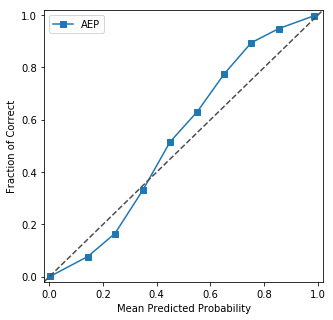

In [48]:
plt.figure(figsize=(5,5))
plt.plot(predict, correct,'s-',
             label="AEP")
plt.legend()
plt.xlim(-0.02,1.02)
plt.ylim(-0.02,1.02)
plt.plot(plt.xlim(), plt.ylim(), ls="--", c=".3")
plt.xlabel("Mean Predicted Probability")
plt.ylabel("Fraction of Correct")
plt.show()

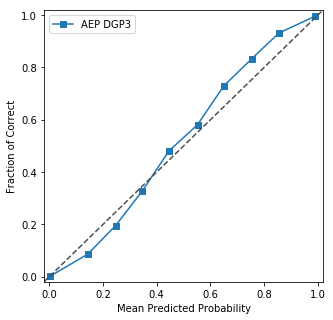

In [14]:
plt.figure(figsize=(5,5))
plt.plot(predict, correct,'s-',
             label="AEP DGP3")
plt.legend()
plt.xlim(-0.02,1.02)
plt.ylim(-0.02,1.02)
plt.plot(plt.xlim(), plt.ylim(), ls="--", c=".3")
plt.xlabel("Mean Predicted Probability")
plt.ylabel("Fraction of Correct")
plt.show()